<a href="https://colab.research.google.com/github/TieBeTie/ComputationalMathematics/blob/main/Practicum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Итерационный метод Ричардсона - это метод решения линейных систем, который основывается на итеративном улучшении приближенного решения. Он может быть применен к любой системе линейных уравнений, где матрица $A$ является диагонально доминантной. Он имеет следующий вид:

$x_{k+1} = x_k + τ (b - Ax_k)$

где $x_k$ - приближенное решение на k-ой итерации, $τ$ - итерационный параметр, и $b$ - правая часть.

Для начала, создадим функцию richardson_iteration, которая будет решать систему линейных уравнений методом Ричардсона:

In [2]:
import numpy as np

def richardson_iteration(A, b, tau, max_iter, tol):
    # Вычисляем диагональную матрицу из A
    D = np.diag(np.diag(A))
    # Вычисляем обратную матрицу D
    D_inv = np.linalg.inv(D)
    # Начальное приближение
    x0 = np.zeros_like(b)
    # Инициализируем массив для хранения нормы невязки
    residuals = np.zeros(max_iter)
    # Итерационный процесс
    for i in range(max_iter):
        # Вычисляем новое приближение
        x = x0 + tau * D_inv.dot(b - A.dot(x0))
        # Вычисляем норму невязки
        residual = np.linalg.norm(b - A.dot(x))
        residuals[i] = residual
        # Проверяем критерий остановки
        if residual < tol:
            break
        # Обновляем приближенное решение
        x0 = x
    return x, residuals[:i+1]


Теперь создадим функцию generate_random_matrix, которая будет создавать матрицу A произвольного размера $n > 100$:

In [3]:
def generate_random_matrix(n):
    # Создаем случайную диагонально доминантную матрицу
    A = np.random.rand(n, n)
    A = A + A.T + np.diag(np.arange(n))
    return A

Также создадим функцию generate_b_vector, которая будет генерировать правую часть системы линейных уравнений:

In [4]:
def generate_b_vector(A):
    # Генерируем случайный вектор
    b = np.random.rand(A.shape[0])
    # Нормируем его
    b = b / np.linalg.norm(b)
    return b


Теперь можем создать основную программу:

Произвольное значение параметра tau: 0.0070
Оптимальное значение параметра tau, рассчитанного по точным собственным числам: 0.0085
Оптимальное значение параметра tau, рассчитанное по оценке собственных чисел: 0.0061
Максимальное и минимальное собственные числа: 236.1318, 0.1828
Норма разницы между точным решением и решением, полученным с помощью numpy.linalg.solve: 0.0000

Значение параметра tau: 0.0001
Количество итераций: 1000
Норма разницы между точным решением и приближенным решением: 0.1408
Норма невязки на последней итерации: 0.6263

Значение параметра tau: 0.0010
Количество итераций: 1000
Норма разницы между точным решением и приближенным решением: 0.1244
Норма невязки на последней итерации: 0.1949

Значение параметра tau: 0.0100
Количество итераций: 1000
Норма разницы между точным решением и приближенным решением: 0.0671
Норма невязки на последней итерации: 0.0272

Норма разницы между случайным tau и точным tau: 0.08131540984111797
Норма разницы между оптимальным оцененным tau 

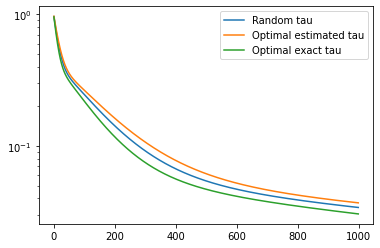

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем параметры
n = 150
tau_values = [0.0001, 0.001, 0.01]  # значения итерационного параметра tau
max_iter = 1000  # максимальное число итераций
tol = 1e-6  # критерий остановки для нормы невязки

# генерируем матрицу A, вектор b, и точное решение x_true
A = generate_random_matrix(n)
b = generate_b_vector(A)
eigenvalues = np.linalg.eigvals(A)
x_true = np.linalg.solve(A, b)

# рассчитываем оценку собственных чисел и оптимальный параметр tau
radii = np.sum(np.abs(A), axis=1) - np.abs(np.diag(A))
tau_optimal_exact = 2 / (np.max(eigenvalues) + np.min(eigenvalues))
tau_optimal_estimated = 1 / np.max(radii)
tau_random = np.random.uniform(0, 2 / np.max(eigenvalues))

# выводим результаты
print(f"Произвольное значение параметра tau: {tau_random:.4f}")
print(f"Оптимальное значение параметра tau, рассчитанного по точным собственным числам: {tau_optimal_exact:.4f}")
print(f"Оптимальное значение параметра tau, рассчитанное по оценке собственных чисел: {tau_optimal_estimated:.4f}")
print(f"Максимальное и минимальное собственные числа: {np.max(eigenvalues):.4f}, {np.min(eigenvalues):.4f}")
print(f"Норма разницы между точным решением и решением, полученным с помощью numpy.linalg.solve: {np.linalg.norm(x_true - np.linalg.solve(A, b)):.4f}\n")

# запускаем метод Ричардсона для трех различных значений tau
for tau in tau_values:
    x, residuals = richardson_iteration(A, b, tau, max_iter, tol)
    print(f"Значение параметра tau: {tau:.4f}")
    print(f"Количество итераций: {len(residuals)}")
    print(f"Норма разницы между точным решением и приближенным решением: {np.linalg.norm(x_true - x):.4f}")
    print(f"Норма невязки на последней итерации: {residuals[-1]:.4f}\n")

# строим график изменения нормы невязки на каждой итерации для произвольного значения tau
x_random_tau, residuals_optimal = richardson_iteration(A, b, tau_random, max_iter, tol)
plt.semilogy(residuals_optimal, label="Random tau")

# строим график изменения нормы невязки на каждой итерации для оптимального значения tau, рассчитанного по оценке собственных чисел
x_optimal_estimated, residuals_optimal = richardson_iteration(A, b, tau_optimal_estimated, max_iter, tol)
plt.semilogy(residuals_optimal, label='Optimal estimated tau')

# строим график изменения нормы невязки на каждой итерации для оптимального значения tau, рассчитанного по точным собственным числам
x_optimal_exact, residuals_optimal = richardson_iteration(A, b, tau_optimal_exact, max_iter, tol)
plt.semilogy(residuals_optimal, label='Optimal exact tau')

# вычисляем точное решение
x_exact = np.linalg.solve(A, b)

# выводим норму разницы между приближенным и точным решениями
print(f'Норма разницы между случайным tau и точным tau: {np.linalg.norm(x_random_tau - x_exact)}')
print(f'Норма разницы между оптимальным оцененным tau и точным tau: {np.linalg.norm(x_optimal_estimated - x_exact)}')
print(f'Норма разницы между оптимальным точным tau и точным tau: {np.linalg.norm(x_optimal_exact - x_exact)}')

plt.legend()
plt.show()
